# Caso Práctico 3.2


* El problema del "***Bandido Multi-Brazo***" es un problema clásico del aprendizaje por refuerzo basado en el ***juego de las máquinas "tragaperras"*** donde se "tira del brazo" (palanca) de la "tragaperras" y se obtiene una recompensa por el juego, positiva si se gana dinero o negativa si perdemos el dinero.


* A este problema se le conoce como el problema del "Bandido Multi-Brazo" al denominarse una máquina "tragaperras" como "Bandido de un solo brazo". Cuando se juega a varias máquinas "tragaperras" se denomina "Bandido de Multiples Brazos", de ahí el nombre de "Multi Armed Bandit" (MAB):


<img src="./imgs/015_RL.png" style="width: 700px;"/>


* El objetivo de este problema es el de ***jugar un 'P' partidas a las 'K' "tragaperras" y obtener el mayor beneficio posible*** (la mayor recompensa posible).


* Para ello tendremos que ir jugando partidas en las 'K' "tragaperras" y descubrir cual es la distribución de probabilidad de obtener premio en cada una de las "tragaperras". Con esto conseguiremos saber a ***que máquinas jugar y en que orden para máximizar nuestros beneficios (o recompensas)***.



* Para resolver este problema definimos el $Q(a)$ como la ***recompensa media (beneficios medios) recibida por partida en la "tragaperras"*** $a$ y se calcula como:


$$Q(a) = \frac{R_a}{N_a}$$


* Siendo:
    + $R_a$: Suma de las recompensas (beneficiós) obtenidos en la "tragaperras" $a$.
    + $N_a$: Número total de partidas jugadas en la "tragaperras" $a$.
    
    
* El ***objetivo es encontrar la máquina "tragaperras" que mayor beneficio (recompensa) dé***:

$$Q(a^{*}) = max Q(a)$$


* Siendo:
    + $a^{*}$: El conjunto de las 'K' "tragaperras" a las que se juega.
    
    
* En este problema es muy importante aplicar correctamente los conceptos de **"Explotación" y "Exploración"** ya que si solo nos dedicamos a "*Explorar*" obtendremos el valor medio de recompensas que dén las 'K' "tragaperras" y si solo nos dedicamos a "*Explotar*" obtendremos la recompensa que nos dé la primera "tragaperras" a la que jugemos.


* Para ello debemos de seguir una política conocida como "***epsilon-greedy policy***" la cual seleccionará una "tragaperras" al azar con probabilidad $\epsilon$ para jugar y *explorar* o seleccionará la mejor "tragaperras" con probabilidad $1-\epsilon$.


<img src="./imgs/016_RL.png" style="width: 300px;"/>


* Veamos a continuación un ejemplo:


In [1]:
import random
import numpy as np


def gen_bandits():
    """
    Función que devuelve una lista de probabilidades ordenadas al azar
    En esta lista se encuentra la probabilidad de premio de cada "tragaperras"
    """
    bandits = [0.1, 0.1, 0.1, 0.2, 0.6]
    random.shuffle(bandits)
    return bandits
    
    
def multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False):
    
    bandits = gen_bandits()
    total_reward = 0
    acum_reward_bandit = np.zeros(len(bandits))  # numerador
    num_selected_bandit = np.zeros(len(bandits)) # denominador
    q_bandits = np.zeros(len(bandits))            # Q(a)
    
    if verbose:
        print("Initial Bandits Distribution\n  {}".format(bandits))
    
    for game in range(0,num_games):
        
        # Hago una copiar de los Q(a)
        old_q_bandits = q_bandits.copy()
        
        # Selecciono "tragaperras" a la que jugar
        if np.random.random() < epsilon:
            bandit = np.random.randint(len(bandits)) # Exploro
        else:
            bandit = np.random.choice(np.flatnonzero(q_bandits == q_bandits.max())) # Exploto 
            
        # Obtengo el reward
        reward = 1 if (np.random.random() < bandits[bandit]) else 0
        
        # Actualizo reward total
        total_reward += reward
        
        # Actualizo valor (Q) de la "tragaperras"
        acum_reward_bandit[bandit] += reward
        num_selected_bandit[bandit] += 1
        q_bandits[bandit] = acum_reward_bandit[bandit] / num_selected_bandit[bandit]
        
        if verbose:
            print("\nGAME {game}\n  Old Q_Bandits = {old_q_bandits}\n  Selected Bandit = {bandit} \
                  \n  Reward = {reward}\n  Q_Bandits = {q_bandits}"
                  .format(game=game+1, old_q_bandits=old_q_bandits, bandit=bandit, 
                          reward=reward, q_bandits=q_bandits))
    
    return bandits, total_reward, q_bandits, num_selected_bandit


### Ratio de Exploración del 10%


* Realizamos una ejecución con un ratio de exploración de un 10% ($\epsilon = 0.1$)

Initial Bandits Distribution
  [0.1, 0.1, 0.1, 0.2, 0.6]
Bandits Distribution games
  [ 16.  46.  11.  20. 907.]
Q(a) Bandits
  [0.     0.1522 0.1818 0.1    0.6042]
Reward: 559


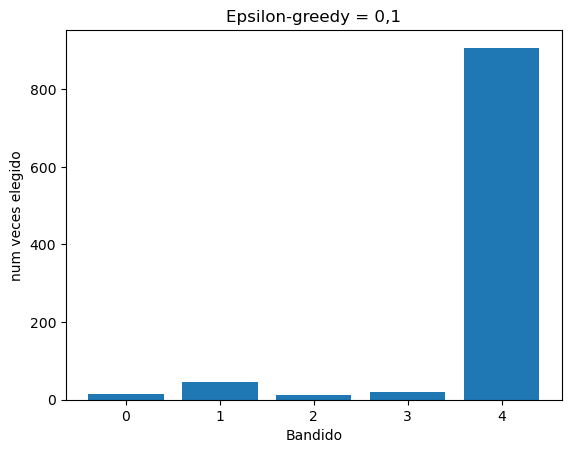

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=4)

bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=0.1, 
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("Reward: {}".format(total_reward))

# Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
plt.title('Epsilon-greedy = 0,1')
plt.bar(range(0,len(bandits)), num_selected_bandit)
plt.xlabel('Bandido')
plt.ylabel('num veces elegido')
plt.show()

### EJERCICO 1: Ratio de Exploración del 99%


* Se pide realizar una simulación como la anterior pero poniendo al 95% el ratio de exploración.

* Observa los resultados obtenido y obten las conclusiones:

    + CONCLUSIONES: A COMPLETAR POR EL ALUMNO

Initial Bandits Distribution
  [0.1, 0.2, 0.1, 0.1, 0.6]
Bandits Distribution games
  [187. 175. 196. 193. 249.]
Q(a) Bandits
  [0.0642 0.12   0.0918 0.0984 0.6345]
Reward: 228


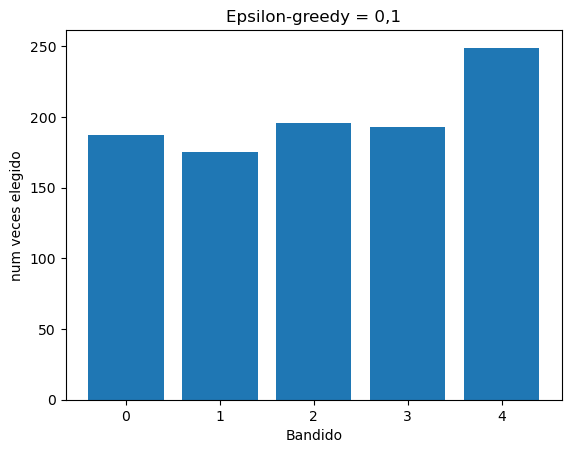

In [5]:
# TODO
bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=0.95, 
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("Reward: {}".format(total_reward))

# Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
plt.title('Epsilon-greedy = 0,1')
plt.bar(range(0,len(bandits)), num_selected_bandit)
plt.xlabel('Bandido')
plt.ylabel('num veces elegido')
plt.show()

### EJERCICO 2: Ratio de Exploración del 0%


* Se pide realizar una simulación como la anterior pero poniendo al 0% el ratio de exploración; es decir, que no se explora.

* Observa los resultados obtenido y obten las conclusiones:

    + CONCLUSIONES: A COMPLETAR POR EL ALUMNO

Initial Bandits Distribution
  [0.1, 0.2, 0.6, 0.1, 0.1]
Bandits Distribution games
  [   0.    0. 1000.    0.    0.]
Q(a) Bandits
  [0.    0.    0.615 0.    0.   ]
Reward: 615


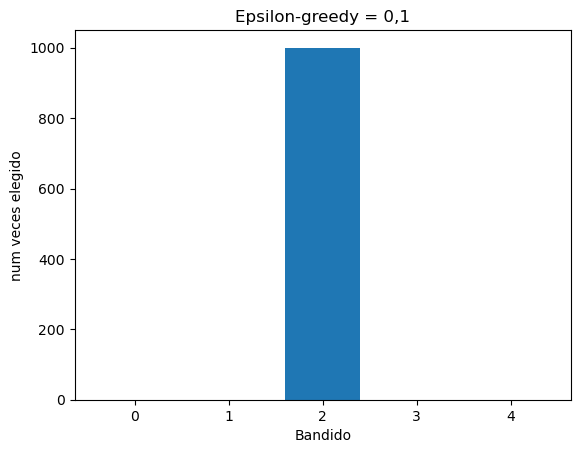

In [6]:
# TODO
bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=0.0, 
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("Reward: {}".format(total_reward))

# Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
plt.title('Epsilon-greedy = 0,1')
plt.bar(range(0,len(bandits)), num_selected_bandit)
plt.xlabel('Bandido')
plt.ylabel('num veces elegido')
plt.show()